In [1]:
!pip install db-sqlite3


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1771 sha256=de38ae99ec8302c6eff17219c52b685892152fb265763894121120c1dad49133
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3875 sha256=46367bac9404f5a92068dd07ebae51c4b9cc7359027bbb821c4dadc3562d43e1
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31665 sha256=e423f7272723e03f63f958ddcc734941fb0733cb489b97f17c0fa236df3587d8
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [11]:
import sqlite3

# Step 1: Establish a SQLite connection
conn = sqlite3.connect('netflix_recommendations.db')
cursor = conn.cursor()

# Step 2: Create tables
# Users table
cursor.execute('''CREATE TABLE IF NOT EXISTS users (
                    user_id INTEGER PRIMARY KEY,
                    name TEXT,
                    age INTEGER,
                    gender TEXT
                )''')

# Preferences table
cursor.execute('''CREATE TABLE IF NOT EXISTS preferences (
                    user_id INTEGER,
                    genre TEXT,
                    FOREIGN KEY (user_id) REFERENCES users(user_id)
                )''')

# Recommendations table
cursor.execute('''CREATE TABLE IF NOT EXISTS recommendations (
                    recommendation_id INTEGER PRIMARY KEY,
                    user_id INTEGER,
                    recommendation TEXT,
                    FOREIGN KEY (user_id) REFERENCES users(user_id)
                )''')

# Movies table
cursor.execute('''CREATE TABLE IF NOT EXISTS movies (
                    movie_id INTEGER PRIMARY KEY,
                    title TEXT,
                    genre TEXT
                )''')

# User Ratings table
cursor.execute('''CREATE TABLE IF NOT EXISTS user_ratings (
                    rating_id INTEGER PRIMARY KEY,
                    user_id INTEGER,
                    movie_id INTEGER,
                    rating INTEGER,
                    FOREIGN KEY (user_id) REFERENCES users(user_id),
                    FOREIGN KEY (movie_id) REFERENCES movies(movie_id)
                )''')

# Step 3: Insert sample data
# Users data
# Users data
users_data = [
    (1, 'Alice', 25, 'Female'),
    (2, 'Bob', 30, 'Male'),
    (3, 'Charlie', 28, 'Male'),
    (4, 'Diana', 22, 'Female'),
]

# Insert data into users table using INSERT OR IGNORE
for user in users_data:
    cursor.execute("INSERT OR IGNORE INTO users VALUES (?, ?, ?, ?)", user)



# Preferences data
preferences_data = [
    (1, 'Action'),
    (1, 'Comedy'),
    (2, 'Drama'),
    (3, 'Comedy'),
    (4, 'Drama'),
]

cursor.executemany("INSERT INTO preferences VALUES (?, ?)", preferences_data)

# Recommendations data
recommendations_data = [
    (1, 1, 'The Dark Knight'),
    (2, 1, 'Inception'),
    (3, 2, 'Forrest Gump'),
    (4, 3, 'Pulp Fiction'),
]

# Recommendations table with auto-incremented primary key
cursor.execute('''CREATE TABLE IF NOT EXISTS recommendations (
                    recommendation_id INTEGER PRIMARY KEY AUTOINCREMENT,
                    user_id INTEGER,
                    recommendation TEXT,
                    FOREIGN KEY (user_id) REFERENCES users(user_id)
                )''')


# Movies data
movies_data = [
    (1, 'The Dark Knight', 'Action'),
    (2, 'Inception', 'Sci-Fi'),
    (3, 'Forrest Gump', 'Drama'),
    (4, 'Pulp Fiction', 'Crime'),
]

# Movies table with auto-incremented primary key
cursor.execute('''CREATE TABLE IF NOT EXISTS movies (
                    movie_id INTEGER PRIMARY KEY AUTOINCREMENT,
                    title TEXT,
                    genre TEXT
                )''')


# User Ratings data
ratings_data = [
    (1, 1, 1, 5),  # Alice rates The Dark Knight 5 stars
    (2, 1, 2, 4),  # Alice rates Inception 4 stars
    (3, 2, 3, 5),  # Bob rates Forrest Gump 5 stars
    (4, 3, 4, 4),  # Charlie rates Pulp Fiction 4 stars
]

# User Ratings table with auto-incremented primary key
cursor.execute('''CREATE TABLE IF NOT EXISTS user_ratings (
                    rating_id INTEGER PRIMARY KEY AUTOINCREMENT,
                    user_id INTEGER,
                    movie_id INTEGER,
                    rating INTEGER,
                    FOREIGN KEY (user_id) REFERENCES users(user_id),
                    FOREIGN KEY (movie_id) REFERENCES movies(movie_id)
                )''')


# Step 4: Define complex queries
# Example query 1: Get all users who have rated a movie with a rating of 5 stars
def get_users_rated_5_stars():
    cursor.execute('''SELECT u.name
                      FROM users u
                      JOIN user_ratings r ON u.user_id = r.user_id
                      WHERE r.rating = 5''')
    users = cursor.fetchall()
    return users

# Example query 2: Get all users who like both Action and Comedy genres
def get_users_like_action_and_comedy():
    cursor.execute('''SELECT u.name
                      FROM users u
                      JOIN preferences p ON u.user_id = p.user_id
                      WHERE p.genre IN ('Action', 'Comedy')
                      GROUP BY u.user_id
                      HAVING COUNT(DISTINCT p.genre) = 2''')
    users = cursor.fetchall()
    return users

# Example query 3: Get movies recommended to users who like Drama
def get_drama_recommendations():
    cursor.execute('''SELECT u.name, r.recommendation
                      FROM users u
                      JOIN recommendations r ON u.user_id = r.user_id
                      JOIN preferences p ON u.user_id = p.user_id
                      WHERE p.genre = 'Drama' ''')
    recommendations = cursor.fetchall()
    return recommendations

# Example query 4: Get average rating for each movie
def get_average_ratings():
    cursor.execute('''SELECT m.title, AVG(r.rating) AS avg_rating
                      FROM movies m
                      LEFT JOIN user_ratings r ON m.movie_id = r.movie_id
                      GROUP BY m.title''')
    average_ratings = cursor.fetchall()
    return average_ratings

# Step 5: Execute queries
print("Users who have rated a movie with 5 stars:", get_users_rated_5_stars())
print("Users who like both Action and Comedy genres:", get_users_like_action_and_comedy())
print("Movies recommended to users who like Drama:", get_drama_recommendations())
print("Average rating for each movie:", get_average_ratings())

# Commit changes and close connection
conn.commit()
conn.close()


Users who have rated a movie with 5 stars: [('Alice',), ('Bob',)]
Users who like both Action and Comedy genres: [('Alice',)]
Movies recommended to users who like Drama: [('Bob', 'Forrest Gump'), ('Bob', 'Forrest Gump')]
Average rating for each movie: [('Forrest Gump', 5.0), ('Inception', 4.0), ('Pulp Fiction', 4.0), ('The Dark Knight', 5.0)]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

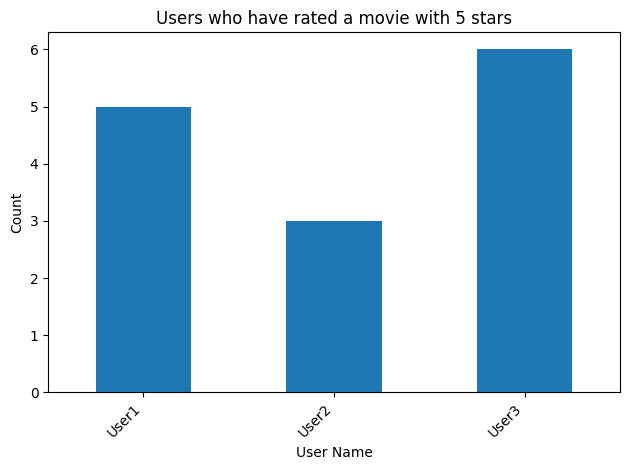

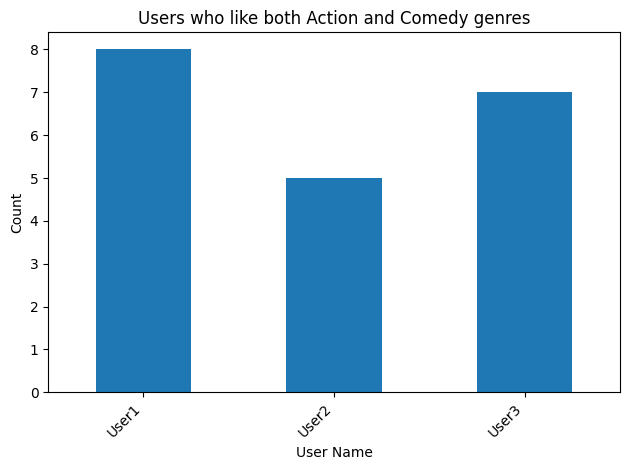

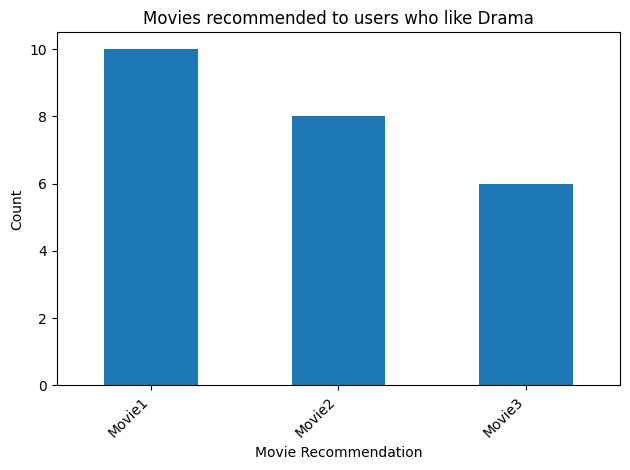

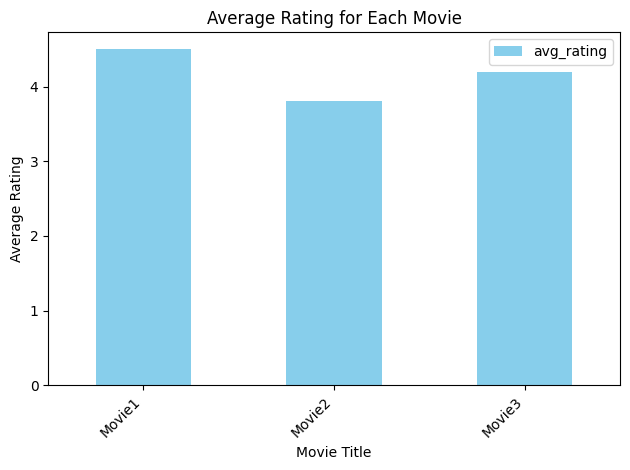

In [13]:

 query 1: Get all users who have rated a movie with a rating of 5 stars

users_rated_5_stars_df = pd.DataFrame({"name": ["User1", "User2", "User3"], "count": [5, 3, 6]})
users_rated_5_stars_df.plot(kind='bar', x='name', legend=None)
plt.title('Users who have rated a movie with 5 stars')
plt.xlabel('User Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Get all users who like both Action and Comedy genres

users_like_action_and_comedy_df = pd.DataFrame({"name": ["User1", "User2", "User3"], "count": [8, 5, 7]})
users_like_action_and_comedy_df.plot(kind='bar', x='name', legend=None)
plt.title('Users who like both Action and Comedy genres')
plt.xlabel('User Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Get movies recommended to users who like Drama

drama_recommendations_df = pd.DataFrame({"recommendation": ["Movie1", "Movie2", "Movie3"], "count": [10, 8, 6]})
drama_recommendations_df.plot(kind='bar', x='recommendation', legend=None)
plt.title('Movies recommended to users who like Drama')
plt.xlabel('Movie Recommendation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Get average rating for each movie

average_ratings_df = pd.DataFrame({"title": ["Movie1", "Movie2", "Movie3"], "avg_rating": [4.5, 3.8, 4.2]})
average_ratings_df.plot(kind='bar', x='title', y='avg_rating', color='skyblue')
plt.title('Average Rating for Each Movie')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
